In [ ]:
# Pyflux
# https://pyflux.readthedocs.io/en/latest/arima.html#example

Text(0.5,1,'Net Bookings')

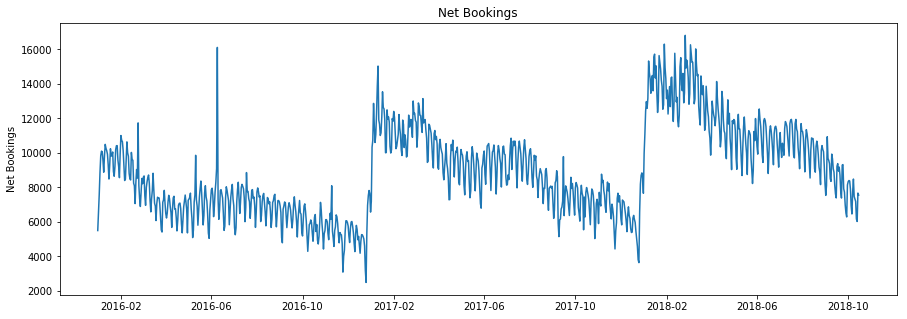

In [2]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'AMR') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.index = pd.to_datetime(df.date)

cols = ["nb"]
y = df[cols]
y.head()

plt.figure(figsize=(15,5))
plt.plot(df.index,df['nb'])
plt.ylabel('Net Bookings')
plt.title('Net Bookings')

In [3]:
model = pf.ARIMA(data=y, ar=4, ma=4, target='nb', family=pf.Normal())

In [4]:
x = model.fit("MLE")
x.summary()

Normal ARIMA(4,0,4)                                                                                       
======================================================= ==================================================
Dependent Variable: nb                                  Method: MLE                                       
Start Date: 2016-01-05 00:00:00                         Log Likelihood: -8490.8873                        
End Date: 2018-10-15 00:00:00                           AIC: 17001.7746                                   
Number of observations: 1015                            BIC: 17051.001                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 8926.7794  1449.0749  6.1603   0.0      (6086.5925 | 11766.9663) 
AR(1)                                

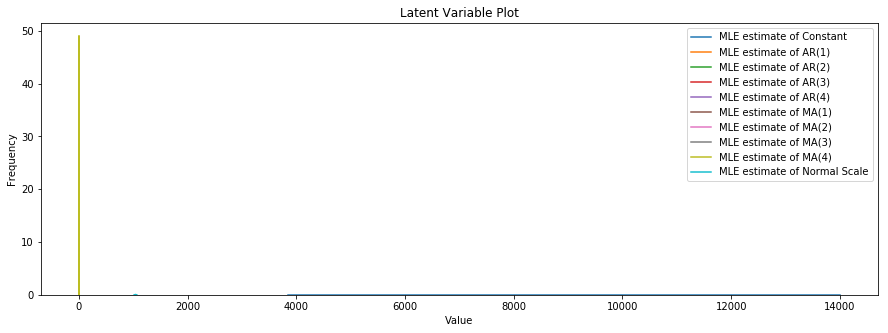

In [5]:
model.plot_z(figsize=(15,5))

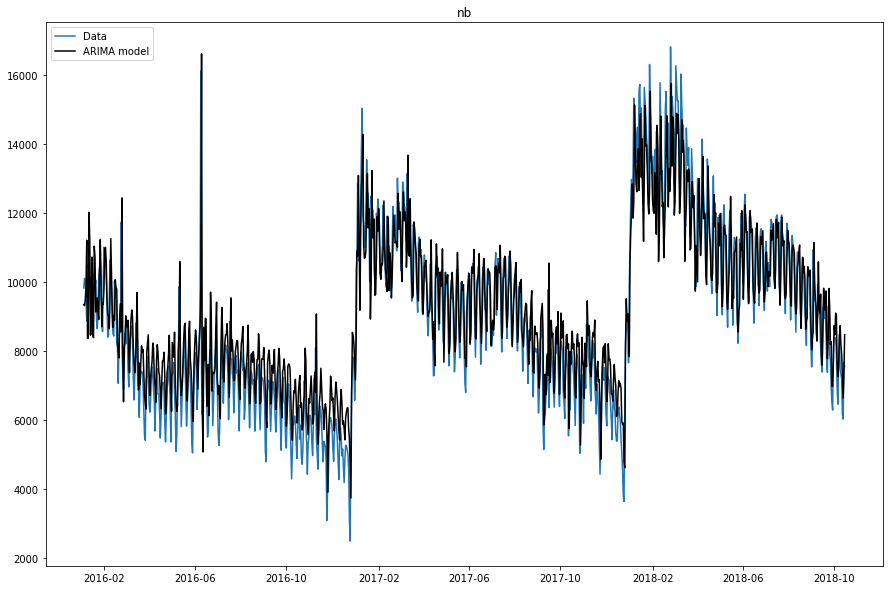

In [6]:
model.plot_fit(figsize=(15,10))

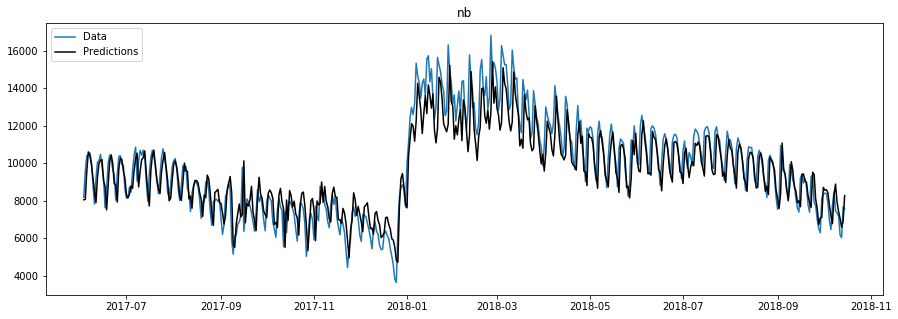

In [8]:
model.plot_predict_is(h=500, figsize=(15,5))

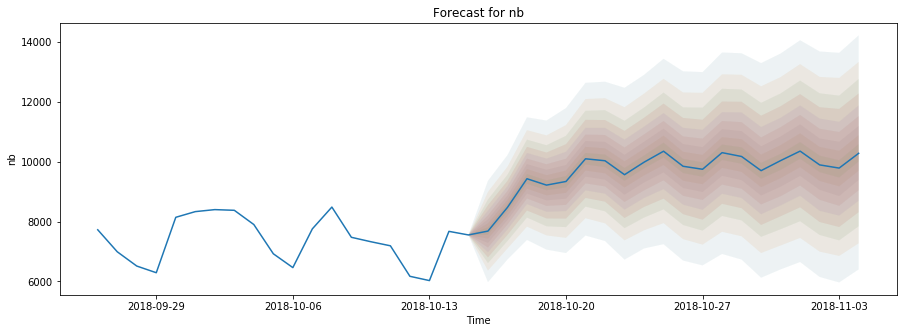

In [11]:
model.plot_predict(h=20,past_values=20,figsize=(15,5))

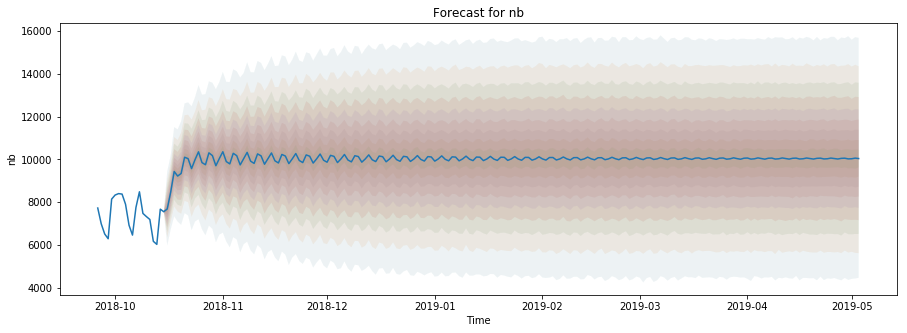

In [12]:
model.plot_predict(h=200,past_values=20,figsize=(15,5))

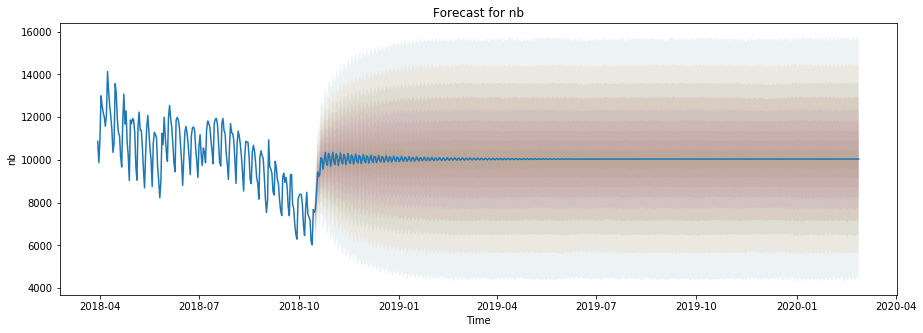

In [17]:
model.plot_predict(h=500,past_values=200,figsize=(15,5))

In [ ]:
model.plot_predict(h=1000,past_values=20,figsize=(15,5))

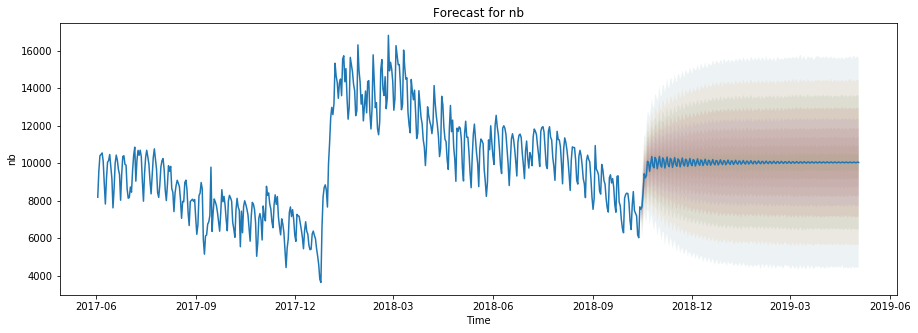

In [16]:
model.plot_predict(h=200,past_values=500,figsize=(15,5))

In [ ]:
# Dynamic Autoregressive Model (DAR)

In [21]:
model = pf.DAR(data=y, ar=3, integ=0, target='nb')

In [24]:
x = model.fit("MLE")
x.summary()

DAR(3, integrated=0)                                                                                      
======================================================= ==================================================
Dependent Variable: nb                                  Method: MLE                                       
Start Date: 2016-01-04 00:00:00                         Log Likelihood: -8394.7672                        
End Date: 2018-10-15 00:00:00                           AIC: 16799.5344                                   
Number of observations: 1016                            BIC: 16824.1525                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Sigma^2 irregular                        526929.268                                                       
Constant                             

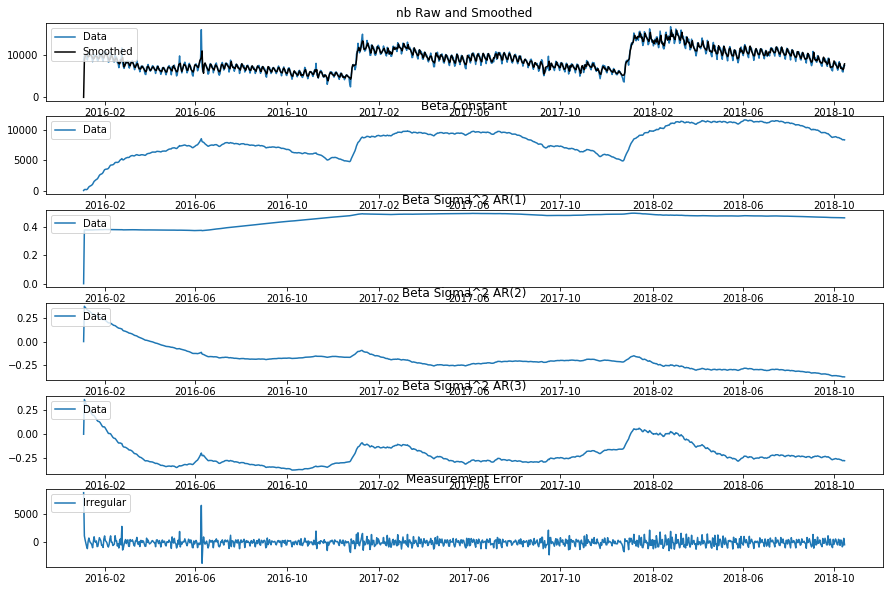

In [25]:
model.plot_fit(figsize=(15,10))

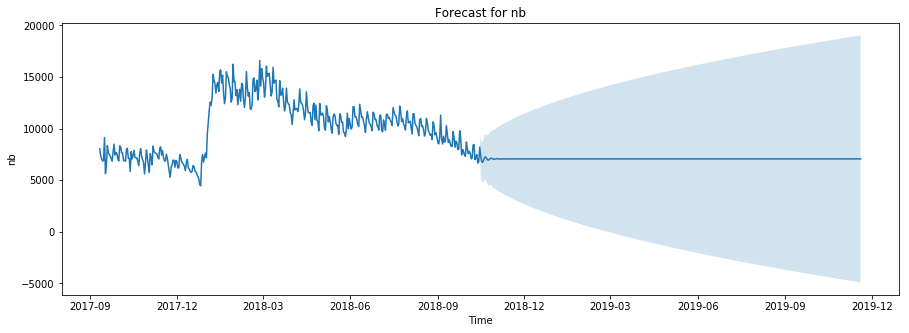

In [29]:
model.plot_predict(h=400, past_values=400, figsize=(15,5))

In [ ]:
# Generalized Autoregressive Conditional Heterscedascticity (GARCH) Models

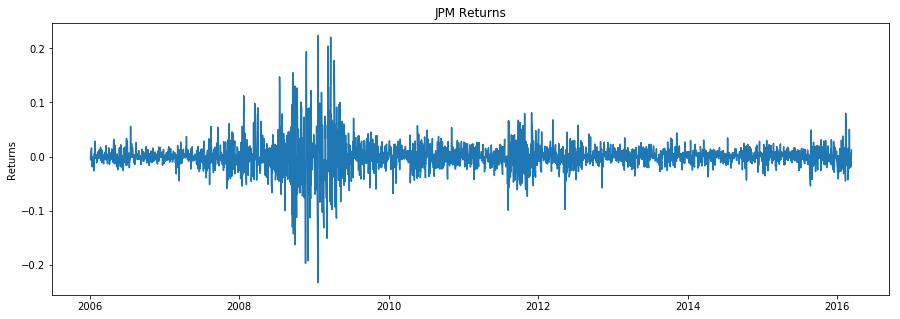

In [30]:
import numpy as np
import pyflux as pf
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

jpm = DataReader('JPM',  'yahoo', datetime(2006,1,1), datetime(2016,3,10))
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('JPM Returns');


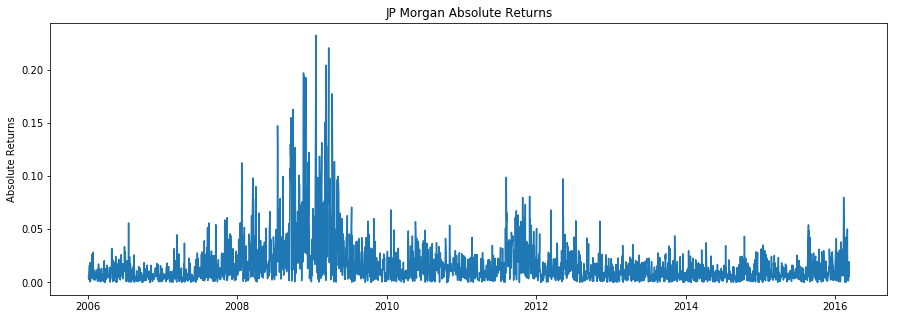

In [31]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

In [32]:
model = pf.GARCH(returns,p=1,q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2006-01-05 00:00:00                         Log Likelihood: 6597.5778                         
End Date: 2016-03-11 00:00:00                           AIC: -13187.1555                                  
Number of observations: 2563                            BIC: -13163.7598                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

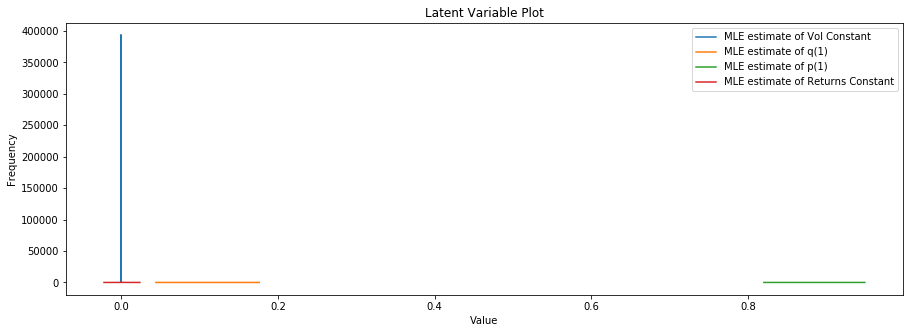

In [33]:
model.plot_z(figsize=(15,5))

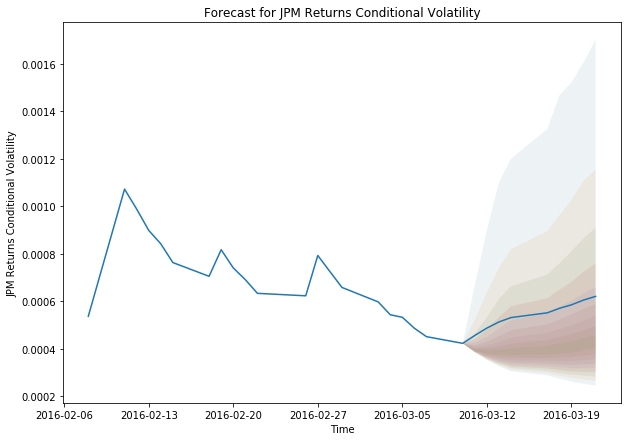

In [34]:
model.plot_predict(h=10)

In [36]:
model = pf.GARCH(y,p=3,q=3)
x = model.fit()
x.summary()

GARCH(3,3)                                                                                                
======================================================= ==================================================
Dependent Variable: nb                                  Method: MLE                                       
Start Date: 2016-01-04 00:00:00                         Log Likelihood: -1741832774.2908                  
End Date: 2018-10-15 00:00:00                           AIC: 3483665564.5816                              
Number of observations: 1016                            BIC: 3483665603.9706                              
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0009                                                           
q(1)                                 

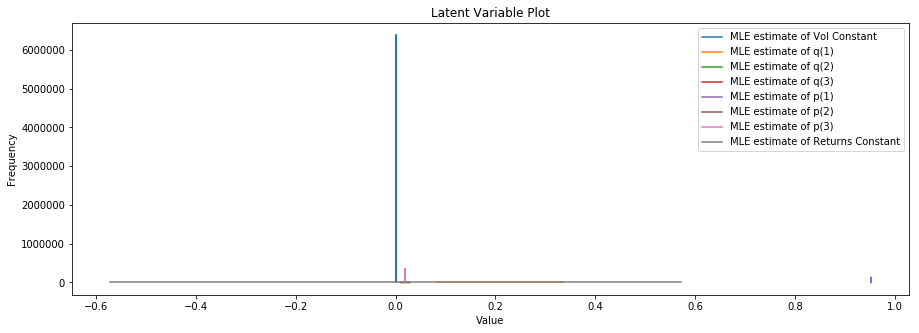

In [37]:
model.plot_z(figsize=(15,5))

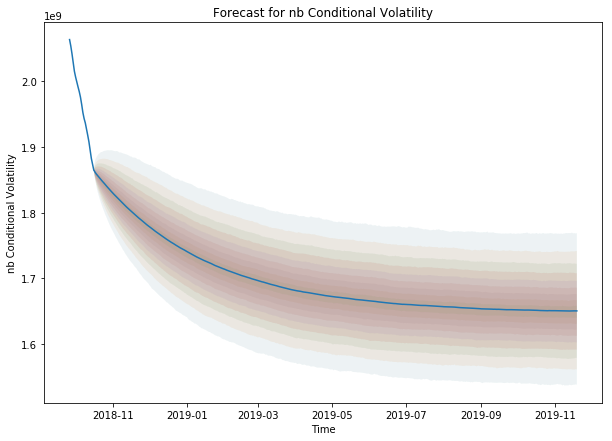

In [39]:
model.plot_predict(h=400)